In [58]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [59]:
first = pd.read_csv('first_clean.csv')
second = pd.read_csv('second_clean.csv')
third = pd.read_csv('third_clean.csv')
sixth = pd.read_csv('sixth_clean.csv')

In [60]:
first.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 373 entries, 0 to 372
Data columns (total 12 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Person ID                373 non-null    int64  
 1   Gender                   373 non-null    int64  
 2   Age                      373 non-null    int64  
 3   Occupation               373 non-null    object 
 4   Sleep Duration           373 non-null    float64
 5   Quality of Sleep         373 non-null    int64  
 6   Physical Activity Level  373 non-null    float64
 7   Stress Level             373 non-null    int64  
 8   BMI Category             373 non-null    int64  
 9   Blood Pressure           373 non-null    float64
 10  Heart Rate               373 non-null    int64  
 11  Daily Steps              373 non-null    int64  
dtypes: float64(3), int64(8), object(1)
memory usage: 35.1+ KB


In [61]:
second.info()  

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 186 entries, 0 to 185
Data columns (total 12 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Person ID                186 non-null    int64  
 1   Gender                   186 non-null    int64  
 2   Age                      186 non-null    int64  
 3   Occupation               186 non-null    object 
 4   Sleep Duration           186 non-null    float64
 5   Quality of Sleep         186 non-null    int64  
 6   Physical Activity Level  186 non-null    float64
 7   Stress Level             186 non-null    int64  
 8   BMI Category             186 non-null    int64  
 9   Blood Pressure           186 non-null    float64
 10  Heart Rate               186 non-null    int64  
 11  Daily Steps              186 non-null    int64  
dtypes: float64(3), int64(8), object(1)
memory usage: 17.6+ KB


In [62]:
third.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 12 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Person ID                400 non-null    int64  
 1   Gender                   400 non-null    int64  
 2   Age                      400 non-null    int64  
 3   Occupation               400 non-null    object 
 4   Sleep Duration           400 non-null    float64
 5   Quality of Sleep         400 non-null    float64
 6   Physical Activity Level  400 non-null    float64
 7   Stress Level             400 non-null    int64  
 8   BMI Category             400 non-null    int64  
 9   Blood Pressure           400 non-null    float64
 10  Heart Rate               400 non-null    int64  
 11  Daily Steps              400 non-null    int64  
dtypes: float64(4), int64(7), object(1)
memory usage: 37.6+ KB


In [63]:
sixth.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 12 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Person ID                1000 non-null   int64  
 1   Sleep Duration           1000 non-null   int64  
 2   Quality of Sleep         1000 non-null   float64
 3   Age                      1000 non-null   int64  
 4   Physical Activity Level  1000 non-null   float64
 5   Stress Level             1000 non-null   int64  
 6   Heart Rate               1000 non-null   int64  
 7   Daily Steps              1000 non-null   int64  
 8   BMI Category             1000 non-null   int64  
 9   Occupation               1000 non-null   object 
 10  Gender                   1000 non-null   int64  
 11  Blood Pressure           1000 non-null   float64
dtypes: float64(3), int64(8), object(1)
memory usage: 93.9+ KB


In [64]:
# Merge by stacking (adding rows)
Sleep_quality= pd.concat([first, second, third , sixth], ignore_index=True)

In [65]:
Sleep_quality

,Person ID,Gender,Age,Occupation,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,BMI Category,Blood Pressure,Heart Rate,Daily Steps
0,1,1,27,Software Engineer,6.1,6.0,0.200000,6,3,1.518072,77,4200
1,2,1,28,Doctor,6.2,6.0,0.500000,8,0,1.562500,75,10000
2,3,1,28,Doctor,6.2,6.0,0.500000,8,0,1.562500,75,10000
3,4,1,28,Sales Representative,5.9,4.0,0.000000,8,2,1.555556,85,3000
4,5,1,28,Sales Representative,5.9,4.0,0.000000,8,2,1.555556,85,3000
...,...,...,...,...,...,...,...,...,...,...,...,...
1954,996,0,36,Engineer,8.0,7.0,0.833333,4,1,1.724638,87,7000
1955,997,1,49,Engineer,7.0,6.5,0.333333,9,0,1.530120,78,6000
1956,998,0,37,Sales Representative,7.0,6.5,0.500000,5,1,1.697368,65,8000
1957,999,0,24,Nurse,5.0,5.5,0.333333,8,0,1.469880,65,7000


In [66]:
Sleep_quality.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1959 entries, 0 to 1958
Data columns (total 12 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Person ID                1959 non-null   int64  
 1   Gender                   1959 non-null   int64  
 2   Age                      1959 non-null   int64  
 3   Occupation               1959 non-null   object 
 4   Sleep Duration           1959 non-null   float64
 5   Quality of Sleep         1959 non-null   float64
 6   Physical Activity Level  1959 non-null   float64
 7   Stress Level             1959 non-null   int64  
 8   BMI Category             1959 non-null   int64  
 9   Blood Pressure           1959 non-null   float64
 10  Heart Rate               1959 non-null   int64  
 11  Daily Steps              1959 non-null   int64  
dtypes: float64(4), int64(7), object(1)
memory usage: 183.8+ KB


In [67]:
Sleep_quality

,Person ID,Gender,Age,Occupation,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,BMI Category,Blood Pressure,Heart Rate,Daily Steps
0,1,1,27,Software Engineer,6.1,6.0,0.200000,6,3,1.518072,77,4200
1,2,1,28,Doctor,6.2,6.0,0.500000,8,0,1.562500,75,10000
2,3,1,28,Doctor,6.2,6.0,0.500000,8,0,1.562500,75,10000
3,4,1,28,Sales Representative,5.9,4.0,0.000000,8,2,1.555556,85,3000
4,5,1,28,Sales Representative,5.9,4.0,0.000000,8,2,1.555556,85,3000
...,...,...,...,...,...,...,...,...,...,...,...,...
1954,996,0,36,Engineer,8.0,7.0,0.833333,4,1,1.724638,87,7000
1955,997,1,49,Engineer,7.0,6.5,0.333333,9,0,1.530120,78,6000
1956,998,0,37,Sales Representative,7.0,6.5,0.500000,5,1,1.697368,65,8000
1957,999,0,24,Nurse,5.0,5.5,0.333333,8,0,1.469880,65,7000


In [68]:
Sleep_quality.duplicated().sum()

np.int64(0)

In [69]:
Sleep_quality.isnull().sum()

Person ID                  0
Gender                     0
Age                        0
Occupation                 0
Sleep Duration             0
Quality of Sleep           0
Physical Activity Level    0
Stress Level               0
BMI Category               0
Blood Pressure             0
Heart Rate                 0
Daily Steps                0
dtype: int64

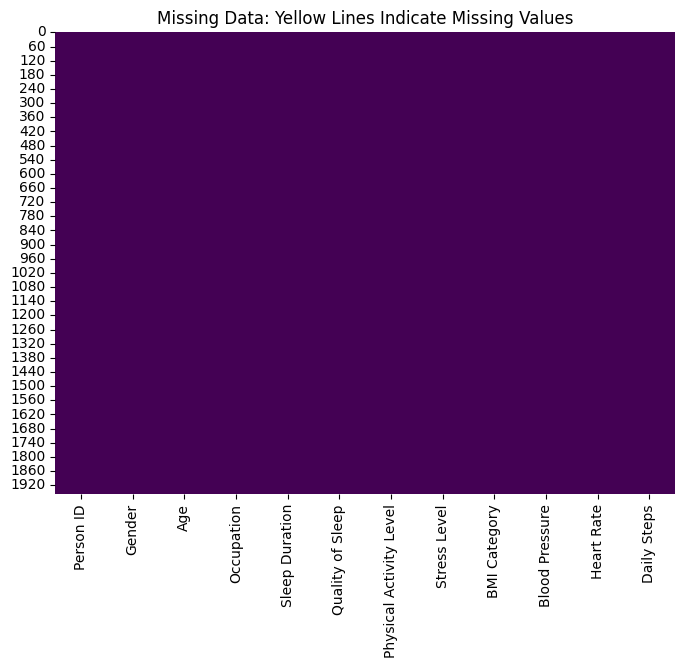

In [70]:
# Explore missing data using a heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(Sleep_quality.isnull(), cbar=False, cmap='viridis')
plt.title('Missing Data: Yellow Lines Indicate Missing Values')
plt.show()

In [71]:
Sleep_quality

,Person ID,Gender,Age,Occupation,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,BMI Category,Blood Pressure,Heart Rate,Daily Steps
0,1,1,27,Software Engineer,6.1,6.0,0.200000,6,3,1.518072,77,4200
1,2,1,28,Doctor,6.2,6.0,0.500000,8,0,1.562500,75,10000
2,3,1,28,Doctor,6.2,6.0,0.500000,8,0,1.562500,75,10000
3,4,1,28,Sales Representative,5.9,4.0,0.000000,8,2,1.555556,85,3000
4,5,1,28,Sales Representative,5.9,4.0,0.000000,8,2,1.555556,85,3000
...,...,...,...,...,...,...,...,...,...,...,...,...
1954,996,0,36,Engineer,8.0,7.0,0.833333,4,1,1.724638,87,7000
1955,997,1,49,Engineer,7.0,6.5,0.333333,9,0,1.530120,78,6000
1956,998,0,37,Sales Representative,7.0,6.5,0.500000,5,1,1.697368,65,8000
1957,999,0,24,Nurse,5.0,5.5,0.333333,8,0,1.469880,65,7000


In [72]:
# drop person Id column
Sleep_quality.drop(columns=['Person ID'], inplace=True)

In [73]:
Sleep_quality

,Gender,Age,Occupation,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,BMI Category,Blood Pressure,Heart Rate,Daily Steps
0,1,27,Software Engineer,6.1,6.0,0.200000,6,3,1.518072,77,4200
1,1,28,Doctor,6.2,6.0,0.500000,8,0,1.562500,75,10000
2,1,28,Doctor,6.2,6.0,0.500000,8,0,1.562500,75,10000
3,1,28,Sales Representative,5.9,4.0,0.000000,8,2,1.555556,85,3000
4,1,28,Sales Representative,5.9,4.0,0.000000,8,2,1.555556,85,3000
...,...,...,...,...,...,...,...,...,...,...,...
1954,0,36,Engineer,8.0,7.0,0.833333,4,1,1.724638,87,7000
1955,1,49,Engineer,7.0,6.5,0.333333,9,0,1.530120,78,6000
1956,0,37,Sales Representative,7.0,6.5,0.500000,5,1,1.697368,65,8000
1957,0,24,Nurse,5.0,5.5,0.333333,8,0,1.469880,65,7000


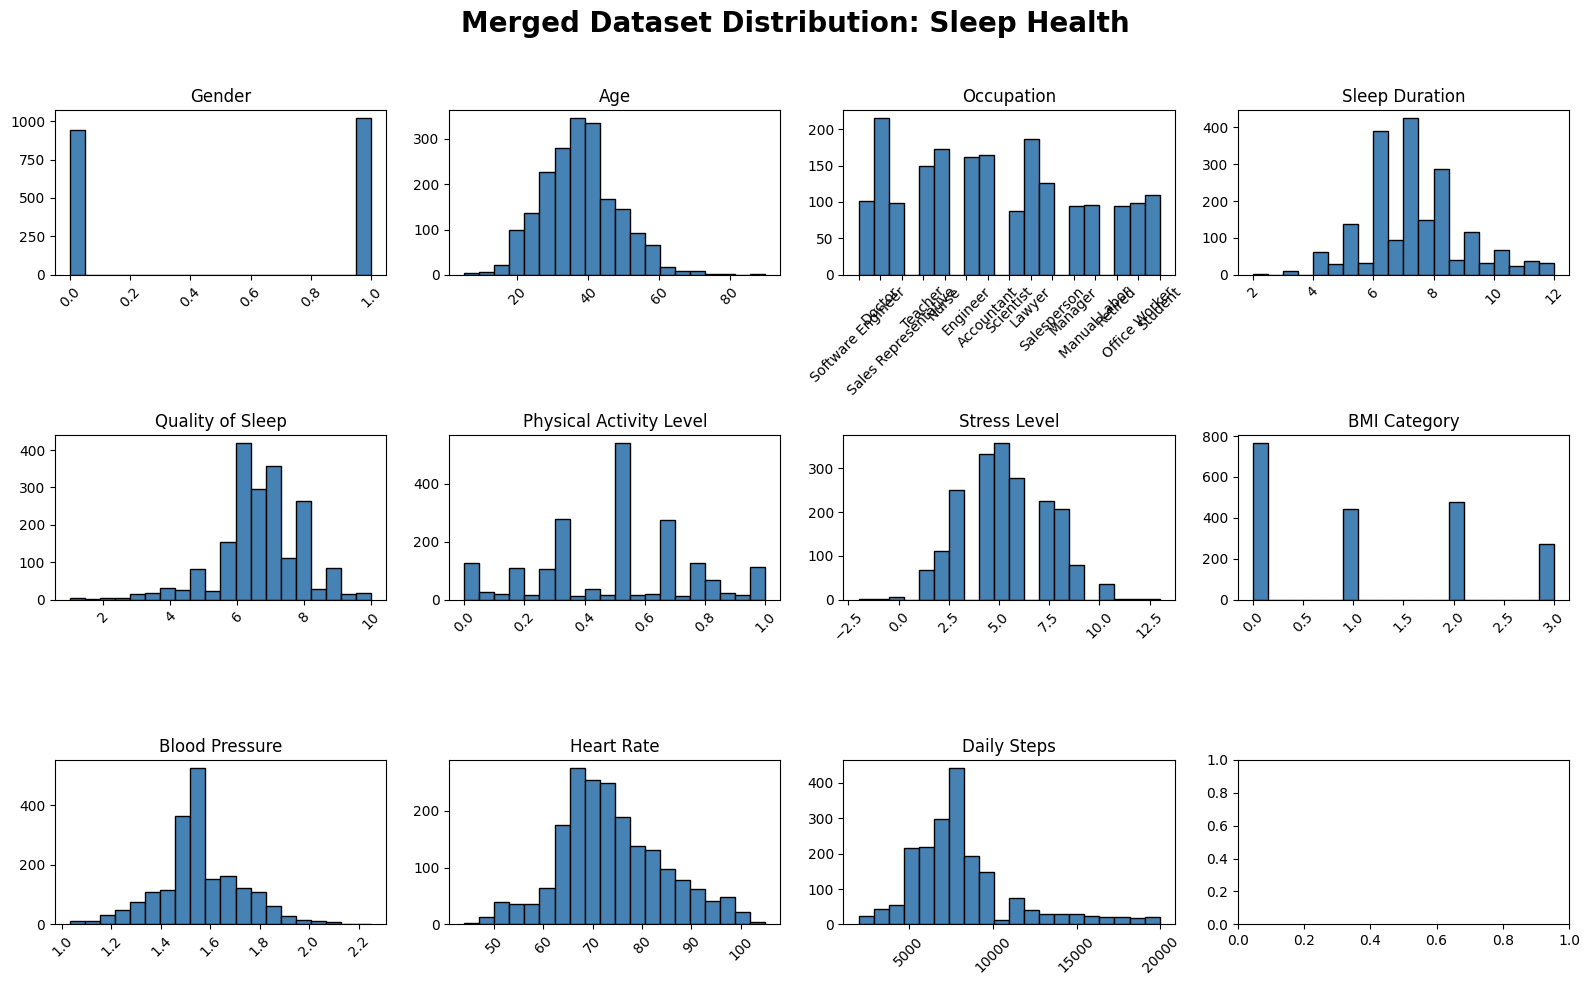

In [74]:
# Plot histograms for all columns in the merged dataset
fig, ax = plt.subplots(nrows=3, ncols=4, figsize=(16, 10))
ax = ax.flatten()

for i, feature in enumerate(Sleep_quality.columns[:11]):  # limit to first 11 features to fit layout
    ax[i].hist(Sleep_quality[feature], bins=20, color='steelblue', edgecolor='black')
    ax[i].set_title(feature)
    ax[i].tick_params(axis='x', rotation=45)

# General figure title
fig.suptitle("Merged Dataset Distribution: Sleep Health", fontsize=20, fontweight='bold')
fig.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()


In [75]:
Sleep_quality.to_csv('merge.csv', index=False)
Sleep_quality

,Gender,Age,Occupation,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,BMI Category,Blood Pressure,Heart Rate,Daily Steps
0,1,27,Software Engineer,6.1,6.0,0.200000,6,3,1.518072,77,4200
1,1,28,Doctor,6.2,6.0,0.500000,8,0,1.562500,75,10000
2,1,28,Doctor,6.2,6.0,0.500000,8,0,1.562500,75,10000
3,1,28,Sales Representative,5.9,4.0,0.000000,8,2,1.555556,85,3000
4,1,28,Sales Representative,5.9,4.0,0.000000,8,2,1.555556,85,3000
...,...,...,...,...,...,...,...,...,...,...,...
1954,0,36,Engineer,8.0,7.0,0.833333,4,1,1.724638,87,7000
1955,1,49,Engineer,7.0,6.5,0.333333,9,0,1.530120,78,6000
1956,0,37,Sales Representative,7.0,6.5,0.500000,5,1,1.697368,65,8000
1957,0,24,Nurse,5.0,5.5,0.333333,8,0,1.469880,65,7000
